In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
pd.options.display.max_columns = 100

In [61]:
train = pd.read_csv('Train.csv')
#test  = pd.read_csv('Test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

In [62]:
train.describe()

,Flight Stops,Meals,Per Person Price
count,21000.000000,21000.000000,21000.000000
mean,0.870286,3.665429,20059.330381
std,0.834989,0.893631,11643.641766
min,0.000000,2.000000,791.000000
25%,0.000000,3.000000,12461.000000
50%,1.000000,3.000000,17765.500000
75%,2.000000,5.000000,25081.375000
max,2.000000,5.000000,171062.500000


In [63]:
train.sample(4)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
14945,1ebb40a757e601cf6538b70e6cc6f1ef,Incredible Kerala,Standard,Munnar|Thekkady|Kumarakom|Kovalam and Poovar,2N Munnar . 1N Thekkady . 2N Kumarakom . 2N Ko...,Munnar|Thekkady|Kumarakom|Kovalam and Poovar,26-09-2021,"Hotel Hillview, Munnar - MMT Special:3.8|Hotel...",Mumbai,Spicejet,2,3,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,16009.5
12084,072b1306fbd874e41ecb47899620215d,7 N in Kerala with Vagamon,Luxury,Munnar|Thekkady|Allepey|Varkala|Kovalam,2N Munnar . 2N Thekkady . 1N Allepey . 1N Vark...,Munnar|Thekkady|Allepey|Varkala|Kovalam,27-01-2022,Parakkat Nature Resorts:4.5|The Mountain Court...,New Delhi,IndiGo|IndiGo,0,4,Valara Waterfalls | Tea Plantation at Devikul...,Cancellation any time after making the 1st pay...,25922.0
8196,71f44e0de6a07624dc37fbcc3dfc804f,Leisurely Vacation in Udaipur - Value Added Ho...,Deluxe,Udaipur,2N Udaipur,Udaipur,06-10-2021,Hotel Yois Udaipur - MMT Holidays Special:,New Delhi,Spicejet|Spicejet,1,3,Lake Pichola | Jag Mandir Palace | Convenienc...,This cancellation policy is applicable for boo...,8970.0
14871,7f23bfbcbdca93ab1d2e2364c9c9e13d,Amazing South via Bangalore,Standard,Ooty|Mysore,2N Ooty . 1N Mysore,Ooty|Mysore,19-05-2021,Hotel Meadows Residency:4.4|Pai Vista Hotel:4.3,New Delhi,IndiGo,2,3,Doddabetta Peak | Ooty Botanical Gardens | Si...,Cancellation any time after making the 1st pay...,15906.0


In [64]:
cancel_rules = train['Cancellation Rules'].unique().tolist()
cancel_map = { s: chr(ord('a')+i)  for (i, s) in enumerate(cancel_rules) }
train['cancel_rule_id'] = train['Cancellation Rules'].map(cancel_map)
train['cancel_rule_id'].value_counts()

b    17574
c     2616
a      795
g        7
h        2
e        2
d        1
j        1
i        1
f        1
Name: cancel_rule_id, dtype: int64

In [65]:
def get_stay_length(rec):
    place_list = rec.split(' . ')
    stay_length = sum([int(n[0]) for n in place_list])
    return stay_length
                      

In [66]:
train['stay_length'] = train.Itinerary.apply(get_stay_length)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count_sightseeing', ylabel='Density'>

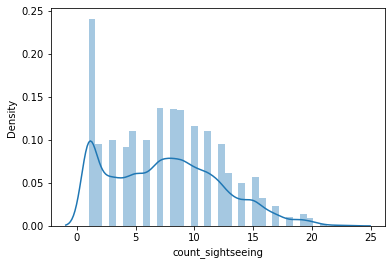

In [67]:
train['count_sightseeing'] = train['Sightseeing Places Covered'].apply(lambda x: len(x.split('|')))
sns.distplot(train.count_sightseeing)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count_places', ylabel='Density'>

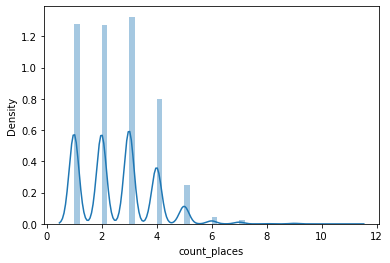

In [68]:
train['count_places'] = train['Places Covered'].apply(lambda x: len(x.split('|')))
sns.distplot(train.count_places)

In [69]:
train.sample(4)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,cancel_rule_id,stay_length,count_sightseeing,count_places
15090,73180ef7f312ead299547b128520e331,Singapore Holiday With Top Attractions,Deluxe,Singapore,4N Singapore,Singapore,03-05-2021,Ramada by Wyndham Singapore At Zhongshan Park:...,Mumbai,Air India|Air India,1,3,Night Safari with Shared Transfers (without D...,Cancellation any time after making the 1st pay...,32093.0,b,4,3,1
1342,c85a6bd6af17334d5df179dc9977f9c0,Vibrant North East with Lachung,Premium,Gangtok|Lachung|Gangtok,4N Gangtok . 2N Lachung . 2N Gangtok,Gangtok|Lachung|Gangtok,08-06-2021,Mayfair Spa Resort & Casino:4.5|Summit Alpine ...,New Delhi,IndiGo,0,5,Changu Lake | Baba Mandir | Do Drul Chorten S...,Cancellation any time after making the 1st pay...,61884.0,b,8,9,3
1771,33ee631735e74568cdfbd42654ae6529,Romantic South Goa Getaway - Luxury Vacation f...,Luxury,Goa,3N Goa,Goa,18-10-2021,The Leela Goa:4.6,New Delhi,Go Air,0,4,Romantic Experiences for Couples from South G...,This cancellation policy is applicable for boo...,21900.5,c,3,2,1
598,f92d250792e6482f0c753ed37e8496b6,Northeast Wow Darjeeling and Gangtok,Standard,Darjeeling|Gangtok,2N Darjeeling . 2N Gangtok,Darjeeling|Gangtok,22-03-2021,Sumi Yashshree Suites & Spa:4.4|Summit Namnang...,New Delhi,IndiGo,2,3,Tiger Hill | Himalayan Mountaineering Institu...,Cancellation any time after making the 1st pay...,19801.0,b,4,15,2


In [70]:
train['travel_month'] = pd.to_datetime(train['Travel Date'], format='%d-%m-%Y').dt.month
train['travel_year'] = pd.to_datetime(train['Travel Date'], format='%d-%m-%Y').dt.year

In [71]:
train.travel_month.unique()

array([ 7, 12,  4,  8,  9,  1, 10,  6,  5,  2, 11,  3], dtype=int64)

In [72]:
train.sample(5)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,cancel_rule_id,stay_length,count_sightseeing,count_places,travel_month,travel_year
932,4fb07f72c81ccc853e12f16a5dd051b2,Bali Special 4 Nights,Deluxe,Bali,4N Bali,Bali,22-06-2021,Kuta Central Park Hotel - MMT Special:4.0,New Delhi,AirAsia X|AirAsia|AirAsia|AirAsia X,1,3,Guided Tanah Lot Tour at Sunset with Private ...,Cancellation any time after making the 1st pay...,24301.0,b,4,1,1,6,2021
8510,1e6d3f89c8ee0f9309328f3eaf4c4202,Corbett and Mussoorie - Luxury in the Wild (Sa...,Luxury,Corbett|Mussoorie,2N Corbett . 2N Mussoorie,Corbett|Mussoorie,30-05-2021,Namah:4.6|The Claridges Nabha Residence - Heri...,New Delhi,Not Available,0,4,Jwalaji Temple | Mall road | Lake Mist | Kemp...,Cancellation any time after making the 1st pay...,18440.0,b,4,4,2,5,2021
8979,f0f1dce11afb42c64ae4e92ce02c3f9f,Monasteries of Ladakh,Deluxe,Leh,4N Leh,Leh,24-05-2021,Singge Palace Hotel:3.6,New Delhi,Spicejet,1,3,Shey Palace | Thiksey Monastery | Hemis Monas...,Cancellation any time after making the 1st pay...,16860.5,b,4,12,1,5,2021
6958,69fcee2dfb6e18c1fe54e42582077c98,Goa for the Nature Lover - Visit to Dudhsagar ...,Standard,Goa,3N Goa,Goa,13-01-2022,Palmarinha Resort And Suites:3.7,New Delhi,Go Air,2,3,Dudhsagar Trip - For North Goa Hotels - Wagon...,This cancellation policy is applicable for boo...,7529.5,c,3,1,1,1,2022
19721,4a847e3f77cb9612038f75bdab74c081,Lovely vacation in Kashmir,Standard,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 2N Srinagar,Srinagar|Pahalgam|Srinagar,20-02-2021,The Pride Inn:4.2|Hotel Hilltop:3.6|The Pride ...,Mumbai,Spicejet|Spicejet,2,3,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,13638.5,b,5,7,3,2,2021


In [73]:
train['count_airtravel'] = train.Airline.apply(lambda x: len(x.split('|')))
train.count_airtravel.value_counts()

1     14918
2      4283
4      1267
3       397
5        82
6        42
10        3
9         3
8         2
7         2
11        1
Name: count_airtravel, dtype: int64

In [74]:
train['dummy'] = 1
airline_list = list(train.groupby('dummy')['Airline'].apply(set).values[0])

airlines = set()
for a in airline_list:
    a1 = set(a.split('|'))
    airlines = airlines.union(a1)

airlines

{'Aeroflot',
 'Air Austral',
 'Air Baltic',
 'Air India',
 'Air India Express',
 'Air Mauritius',
 'Air New Zealand',
 'Air Seychelles',
 'AirAsia',
 'AirAsia Indonesia',
 'AirAsia X',
 'Airconnect',
 'Bangkok Airways',
 'British Airways',
 'Brussels Airlines',
 'Cathay Pacific',
 'China Eastern',
 'China Southern',
 'EgyptAir',
 'Emirates',
 'Ethiopian Airlines',
 'Etihad Airways',
 'Finnair',
 'Garuda Indonesia',
 'Go Air',
 'Gulf Air',
 'IndiGo',
 'Jetstar Airways',
 'Jetstar Asia',
 'Kenya Airways',
 'Kuwait Airways',
 'Lufthansa',
 'Malaysia Airlines',
 'Malindo Air',
 'Norwegian',
 'Not Available',
 'Oman Air',
 'Philippine Airlines',
 'Qantas Airways',
 'Qatar Airways',
 'Saudia',
 'Scoot',
 'Sichuan Airlines',
 'Silkair',
 'Singapore Airlines',
 'South African Airways',
 'Spicejet',
 'Srilankan Airlines',
 'Swiss',
 'Thai AirAsia',
 'Thai Airways',
 'Thai Vietjet Air',
 'Turkish Airlines',
 'Uzbekistan Airways',
 'Virgin Atlantic',
 'Vistara'}

In [75]:
for airline_col in list(airlines):
    train[airline_col] = 0

In [76]:
for i in range(train.shape[0]):
    rec = train.at[i, 'Airline']
    travel_airlines = list(set(rec.split('|')))
    for ta in travel_airlines:
        train.at[i, ta] = 1

In [77]:
travel_airlines

['IndiGo']

In [78]:
train.tail(1)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,cancel_rule_id,stay_length,count_sightseeing,count_places,travel_month,travel_year,count_airtravel,dummy,Jetstar Asia,British Airways,Garuda Indonesia,Saudia,Ethiopian Airlines,Air India,Singapore Airlines,Swiss,Brussels Airlines,Malindo Air,Qatar Airways,Lufthansa,AirAsia,Norwegian,Air Seychelles,Air Baltic,Scoot,Thai AirAsia,Malaysia Airlines,Bangkok Airways,Philippine Airlines,Jetstar Airways,Etihad Airways,China Southern,AirAsia Indonesia,Kenya Airways,Air India Express,South African Airways,Oman Air,Gulf Air,Emirates,Not Available,AirAsia X,Silkair,Sichuan Airlines,Uzbekistan Airways,IndiGo,Virgin Atlantic,Air New Zealand,Thai Airways,Srilankan Airlines,EgyptAir,Finnair,Aeroflot,Thai Vietjet Air,Go Air,Qantas Airways,Turkish Airlines,Spicejet,Kuwait Airways,Air Mauritius,Airconnect,China Eastern,Cathay Pacific,Vistara,Air Austral
20999,5ed596587aba74b3f52a59384c04b5a4,"Munnar, Kovalam, Allepey Holiday",Standard,Munnar|Kovalam|Allepey,3N Munnar . 2N Kovalam . 1N Allepey,Munnar|Kovalam|Allepey,30-05-2021,Iceberg Hill Hotel-MMT Holidays Special:3.8|Sa...,New Delhi,IndiGo,2,3,Tata Tea Museum | Eravikulam national park | ...,Cancellation any time after making the 1st pay...,15736.0,b,6,8,3,5,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
train['Hotel Details'].values

array(['Not Available',
       'The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6',
       'The Ananta:4.4|juSTa Lake Nahargarh Palace:4', ...,
       'Mount Lavinia Hotel-MMT HOLIDAYS SPECIAL:4.0',
       'Ramada by Wyndham Darjeeling Gandhi Road:4.4|The Aryan Regency:3.7|Lemon Tree Hotel  Gangtok:4.2',
       'Iceberg Hill Hotel-MMT Holidays Special:3.8|Sagara Beach Resort - MMT Holidays Special:|Hotel Royale Park:'],
      dtype=object)

In [80]:
X = train.drop(['Uniq Id', 'Package Name', 'Places Covered'], axis=1)

In [81]:
n_map = { '': 0, 'Not Available':9, 'One': 1, 'Two': 2, 'Three': 3, 'Four':4, 'Five':5}
n_map.get('Not Available', 1)

9

In [82]:
n_map.keys()

dict_keys(['', 'Not Available', 'One', 'Two', 'Three', 'Four', 'Five'])

In [83]:
def fix(n):
    n_map = { 'Not Available':0, '': 0, 'One': 1, 'Two': 2, 'Three': 3, 'Four':4, 'Five':5}
    ret_value = n_map.get(n)
    if ret_value is None:
        return float(n)
    else:
        return ret_value

def mean(l):
    nozero = [i for i in l if i!=0 ]
    if len(nozero) == 0:
        return 0
    nozero_mean = sum(nozero)/len(nozero)
    nozero_l = [i if i!= 0 else nozero_mean for i in l ]

    return np.round(sum(nozero_l)/len(nozero_l), 2)

In [84]:
X['mean_hotel_rating'] = X['Hotel Details'].apply(lambda x: x.split('|')).\
                   apply(lambda x: [p.split(':')[-1] for p in x] ).\
                   apply(lambda x: mean([fix(i) for i in x]) )

In [85]:
X['count_hotel'] = X['Hotel Details'].apply(lambda x: len(x.split('|')))

In [86]:
X.sample(4)

,Package Type,Destination,Itinerary,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,cancel_rule_id,stay_length,count_sightseeing,count_places,travel_month,travel_year,count_airtravel,dummy,Jetstar Asia,British Airways,Garuda Indonesia,Saudia,Ethiopian Airlines,Air India,Singapore Airlines,Swiss,Brussels Airlines,Malindo Air,Qatar Airways,Lufthansa,AirAsia,Norwegian,Air Seychelles,Air Baltic,Scoot,Thai AirAsia,Malaysia Airlines,Bangkok Airways,Philippine Airlines,Jetstar Airways,Etihad Airways,China Southern,AirAsia Indonesia,Kenya Airways,Air India Express,South African Airways,Oman Air,Gulf Air,Emirates,Not Available,AirAsia X,Silkair,Sichuan Airlines,Uzbekistan Airways,IndiGo,Virgin Atlantic,Air New Zealand,Thai Airways,Srilankan Airlines,EgyptAir,Finnair,Aeroflot,Thai Vietjet Air,Go Air,Qantas Airways,Turkish Airlines,Spicejet,Kuwait Airways,Air Mauritius,Airconnect,China Eastern,Cathay Pacific,Vistara,Air Austral,mean_hotel_rating,count_hotel
20932,Standard,Srinagar,2N Srinagar,21-07-2021,The Pride Inn:4.2,New Delhi,Go Air,2,3,Dal Lake | Gondola Point,Cancellation any time after making the 1st pay...,6640.5,b,2,2,1,7,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.2,1
5012,Premium,Bangalore|Mysore|Ooty,1N Bangalore . 1N Mysore . 2N Ooty,28-06-2021,The Chancery Pavilion:3.8|Country Inn And Suit...,New Delhi,Air India|Spicejet,0,5,Bull Temple | Commercial Street | Vidhana Sou...,Cancellation any time after making the 1st pay...,14462.5,b,4,13,3,6,2021,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.9,3
20753,Standard,Darjeeling|Pelling|Gangtok,2N Darjeeling . 2N Pelling . 2N Gangtok,18-07-2021,Summit Swiss Heritage Hotel & Spa:4.1|Summit N...,New Delhi,Spicejet,2,3,Tiger Hill | Himalayan Mountaineering Institu...,Cancellation any time after making the 1st pay...,22293.0,b,6,22,3,7,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4.0,3
3361,Standard,Darjeeling,3N Darjeeling,17-02-2021,Summit Swiss Heritage Hotel & Spa:Three,Mumbai,Not Available,2,3,Tiger Hill | Himalayan Mountaineering Institu...,This cancellation policy is applicable for boo...,9909.0,c,3,11,1,2,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,1


In [87]:
X['Start City'].value_counts()

New Delhi    13733
Mumbai        7267
Name: Start City, dtype: int64

In [88]:
X['destination_first'] = X.Destination.apply(lambda x: x.split('|')[0])
X['destination_last'] = X.Destination.apply(lambda x: x.split('|')[-1])
X[['destination_first', 'destination_last', 'Destination']].sample(10)


,destination_first,destination_last,Destination
12928,Haridwar,Haridwar,Haridwar
17376,New Delhi,Jaipur,New Delhi|Agra|Ranthambhore|Jaipur
3345,Shimla,Chandigarh,Shimla|Manali|Chandigarh
13852,Chandigarh,Manali,Chandigarh|Manali
19345,Nainital,New Delhi,Nainital|Kausani|Ranikhet|New Delhi
8538,New Delhi,Jaipur,New Delhi|Agra|Jaipur
10572,Tanjore,Tiruchirapally,Tanjore|Kumbakonam|Tiruchirapally
2212,New Delhi,Jaipur,New Delhi|Agra|Ranthambhore|Jaipur
11560,Nainital,Mussoorie,Nainital|Haridwar|Mussoorie
12925,Shimla,Manali,Shimla|Manali


In [89]:
X_final = X.drop(['Travel Date', 'Destination', 'Itinerary', 'Airline', 
                  'Sightseeing Places Covered', 'Cancellation Rules', 'Hotel Details'], axis=1)
X_final.sample(5)

,Package Type,Start City,Flight Stops,Meals,Per Person Price,cancel_rule_id,stay_length,count_sightseeing,count_places,travel_month,travel_year,count_airtravel,dummy,Jetstar Asia,British Airways,Garuda Indonesia,Saudia,Ethiopian Airlines,Air India,Singapore Airlines,Swiss,Brussels Airlines,Malindo Air,Qatar Airways,Lufthansa,AirAsia,Norwegian,Air Seychelles,Air Baltic,Scoot,Thai AirAsia,Malaysia Airlines,Bangkok Airways,Philippine Airlines,Jetstar Airways,Etihad Airways,China Southern,AirAsia Indonesia,Kenya Airways,Air India Express,South African Airways,Oman Air,Gulf Air,Emirates,Not Available,AirAsia X,Silkair,Sichuan Airlines,Uzbekistan Airways,IndiGo,Virgin Atlantic,Air New Zealand,Thai Airways,Srilankan Airlines,EgyptAir,Finnair,Aeroflot,Thai Vietjet Air,Go Air,Qantas Airways,Turkish Airlines,Spicejet,Kuwait Airways,Air Mauritius,Airconnect,China Eastern,Cathay Pacific,Vistara,Air Austral,mean_hotel_rating,count_hotel,destination_first,destination_last
10284,Standard,Mumbai,2,3,22446.5,c,4,3,1,4,2021,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.50,1,Dubai,Dubai
13426,Standard,New Delhi,2,3,5236.5,c,2,4,2,9,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.20,2,Haridwar,Rishikesh
12084,Luxury,New Delhi,0,4,25922.0,b,7,13,5,1,2022,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.25,5,Munnar,Kovalam
3421,Standard,New Delhi,2,3,5674.0,b,4,1,1,10,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,1,Kuala Lumpur,Kuala Lumpur
9498,Deluxe,New Delhi,1,3,17187.0,b,6,9,4,11,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.80,4,Srinagar,Srinagar


In [109]:
cat_cols = ['Package Type', 'cancel_rule_id', 'destination_first', 'destination_last', 'Start City']
num_cols = set(X_final.columns) - set(cat_cols) - {'Per Person Price', 'logPrice', 'dummy'}
num_cols

{'Aeroflot',
 'Air Austral',
 'Air Baltic',
 'Air India',
 'Air India Express',
 'Air Mauritius',
 'Air New Zealand',
 'Air Seychelles',
 'AirAsia',
 'AirAsia Indonesia',
 'AirAsia X',
 'Airconnect',
 'Bangkok Airways',
 'British Airways',
 'Brussels Airlines',
 'Cathay Pacific',
 'China Eastern',
 'China Southern',
 'EgyptAir',
 'Emirates',
 'Ethiopian Airlines',
 'Etihad Airways',
 'Finnair',
 'Flight Stops',
 'Garuda Indonesia',
 'Go Air',
 'Gulf Air',
 'IndiGo',
 'Jetstar Airways',
 'Jetstar Asia',
 'Kenya Airways',
 'Kuwait Airways',
 'Lufthansa',
 'Malaysia Airlines',
 'Malindo Air',
 'Meals',
 'Norwegian',
 'Not Available',
 'Oman Air',
 'Philippine Airlines',
 'Qantas Airways',
 'Qatar Airways',
 'Saudia',
 'Scoot',
 'Sichuan Airlines',
 'Silkair',
 'Singapore Airlines',
 'South African Airways',
 'Spicejet',
 'Srilankan Airlines',
 'Swiss',
 'Thai AirAsia',
 'Thai Airways',
 'Thai Vietjet Air',
 'Turkish Airlines',
 'Uzbekistan Airways',
 'Virgin Atlantic',
 'Vistara',
 'count

In [110]:
X_final['logPrice'] = np.log(X_final['Per Person Price'])
upPrice = np.quantile(X_final.logPrice, 0.98)
downPrice = np.quantile(X_final.logPrice, 0.02)
X_final.loc[X_final.logPrice>upPrice, 'logPrice'] = upPrice
X_final.loc[X_final.logPrice<downPrice, 'logPrice'] = downPrice

<AxesSubplot:xlabel='Package Type', ylabel='logPrice'>

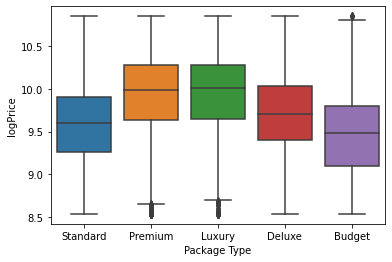

In [101]:
sns.boxplot(x='Package Type', y='logPrice', data=X_final)

In [112]:
import category_encoders as ce
ce.CountEncoder().fit_transform (X_final[num_cols])

,Garuda Indonesia,Ethiopian Airlines,Air India,Malindo Air,Lufthansa,AirAsia,Air Seychelles,Air Baltic,Scoot,Malaysia Airlines,Bangkok Airways,Philippine Airlines,Etihad Airways,AirAsia Indonesia,stay_length,count_airtravel,Oman Air,Gulf Air,Emirates,AirAsia X,Silkair,travel_month,Air New Zealand,EgyptAir,Srilankan Airlines,Finnair,Aeroflot,Thai Vietjet Air,Spicejet,Kuwait Airways,Airconnect,China Eastern,Cathay Pacific,Vistara,Air Austral,Jetstar Asia,British Airways,count_sightseeing,Saudia,Singapore Airlines,Swiss,Brussels Airlines,Qatar Airways,Norwegian,Thai AirAsia,mean_hotel_rating,Jetstar Airways,China Southern,Meals,Flight Stops,Kenya Airways,Air India Express,South African Airways,Not Available,Uzbekistan Airways,count_places,Sichuan Airlines,IndiGo,Virgin Atlantic,Thai Airways,travel_year,Go Air,Qantas Airways,Turkish Airlines,count_hotel,Air Mauritius
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00,0,0,3,2,0,0,0,1,0,4,0,0,0,0,2021,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,4.43,0,0,5,0,0,0,0,0,0,3,0,1,0,0,2021,0,0,0,3,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,4.20,0,0,4,0,0,0,0,0,0,2,0,1,0,0,2021,0,0,0,2,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,4.50,0,0,5,0,0,0,0,0,0,4,0,1,0,0,2021,0,0,0,4,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,0,0,0,0,0,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,4.35,0,0,5,0,0,0,0,0,0,2,0,0,0,0,2021,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,4.00,0,0,3,1,0,0,0,1,0,3,0,0,0,0,2021,0,0,0,3,0
20996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9,0,0,0,0,0,0,0,4.30,0,0,4,0,0,0,0,0,0,4,0,0,0,0,2021,0,0,0,4,0
20997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,4.00,0,0,3,1,0,0,0,0,0,1,0,1,0,0,2021,0,0,0,1,0
20998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,4.10,0,0,3,1,0,0,0,0,0,3,0,1,0,0,2022,0,0,0,3,0


In [114]:
df = pd.concat([X_final[num_cols], ce.CountEncoder().fit_transform(X_final[cat_cols])], axis=1)
y = X_final.logPrice

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify = df.cancel_rule_id)

In [117]:
for algo in (ExtraTreesRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()):
    algo.fit(X_train, y_train)
    print (algo.score(X_test, y_test))

0.8500065259692862
0.8707907053337853
0.592675624225367
0.7926611103247485


In [ ]:
rf_model = RandomForestRegressor().fit(X_train, y_train)

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

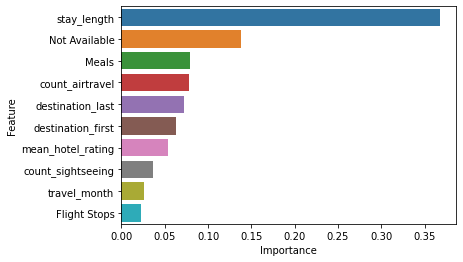

In [122]:
df_importance = pd.DataFrame( rf_model.feature_importances_, columns=['Importance'] )
df_importance['Feature'] = X_train.columns.tolist()
df_importance.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=df_importance.head(10))

In [123]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(
        np.exp(y_test), 
        np.exp(rf_model.predict(X_test))))

0.18662886590752997